Perrin Freres Monthly Champagne Sales

This analysis examines the "Perrin Freres monthly champagne sales" dataset to identify underlying patterns, specifically focusing on seasonality and autocorrelation. We will use Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to understand the time series' characteristics, which is a crucial step for forecasting models like ARIMA and SARIMA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Load dataset
df = pd.read_csv('C:/Daily drive/College/sem 5/piyush_sir_ai_&_ml/projects/tsa/project 5/perrin-freres-monthly-champagne-.csv')

In [3]:
# Clean and rename columns
df.columns = ['Month', 'Sales']
df = df[pd.to_datetime(df['Month'], errors='coerce').notna()]  # remove bad rows
df['Month'] = pd.to_datetime(df['Month'])
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df.dropna(subset=['Sales'], inplace=True)
df.set_index('Month', inplace=True)

Seasonality:
There are clear annual spikes, indicating a seasonal sales pattern — most likely peaking during year-end festivities.

Trend:
Overall, there is a positive trend — sales seem to grow year over year, particularly the peaks.

Simplicity:

This chart is a cleaner, minimal version of the earlier one.

It omits data point markers for clarity and better focus on the trend line.

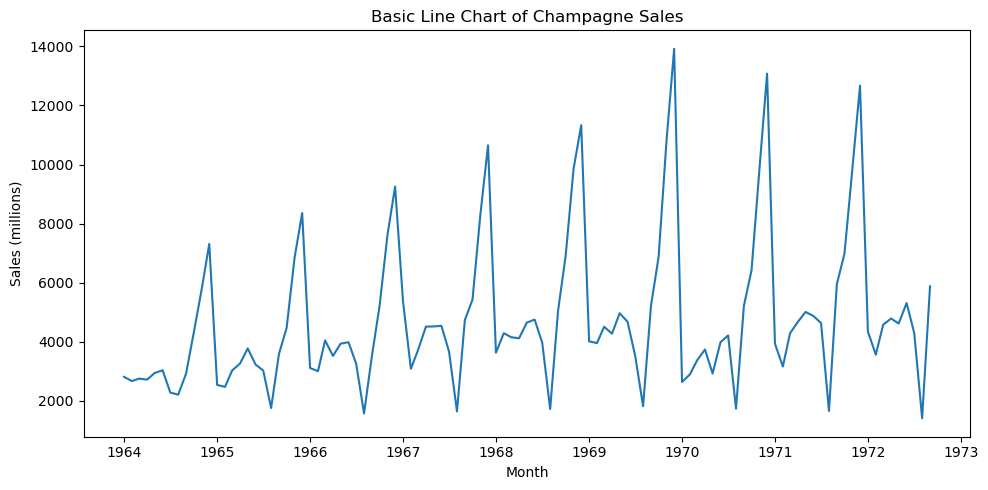

In [4]:
# Basic line chart
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'])
plt.title('Basic Line Chart of Champagne Sales')
plt.xlabel('Month')
plt.ylabel('Sales (millions)')
plt.tight_layout()
plt.show()

The graph shows monthly champagne sales (in millions) from 1964 to 1972. Key points:

There's a strong seasonal pattern, with sales peaking around year-end (likely December).

Overall, there's a clear upward trend, indicating increasing sales over the years.

Occasional sharp spikes suggest holiday or festive demand.

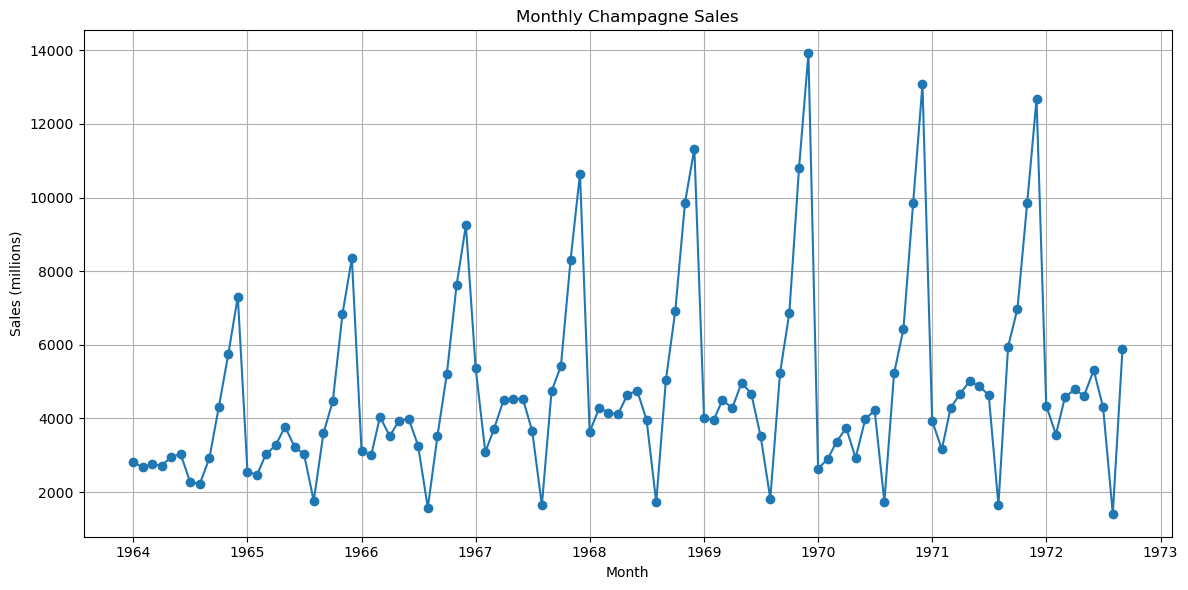

In [5]:
# Enhanced time series line chart with markers
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], marker='o', linestyle='-')
plt.title("Monthly Champagne Sales")
plt.xlabel("Month")
plt.ylabel("Sales (millions)")
plt.grid(True)
plt.tight_layout()
plt.show()

Top Plot: Autocorrelation Function (ACF)
Purpose: Shows how each observation in a time series is correlated with its past values (lags).

Interpretation:

A significant spike at lag 1 and gradual decay suggests AR (AutoRegressive) or seasonal patterns.

Several spikes (especially around lags 12, 24, etc.) hint at seasonality — consistent with champagne sales peaking annually.

Confidence Bands: The shaded blue region represents the 95% confidence interval. Spikes outside this range are statistically significant.

Bottom Plot: Partial Autocorrelation Function (PACF)
Purpose: Shows the correlation of the time series with its lags after removing the influence of intermediate lags.

Interpretation:

A strong spike at lag 1 and possibly at lag 12 or lag 13 suggests a good candidate for AR(1) or seasonal AR(12) models.

Lags beyond the first few are within the confidence bounds, suggesting limited direct partial correlation after those points.

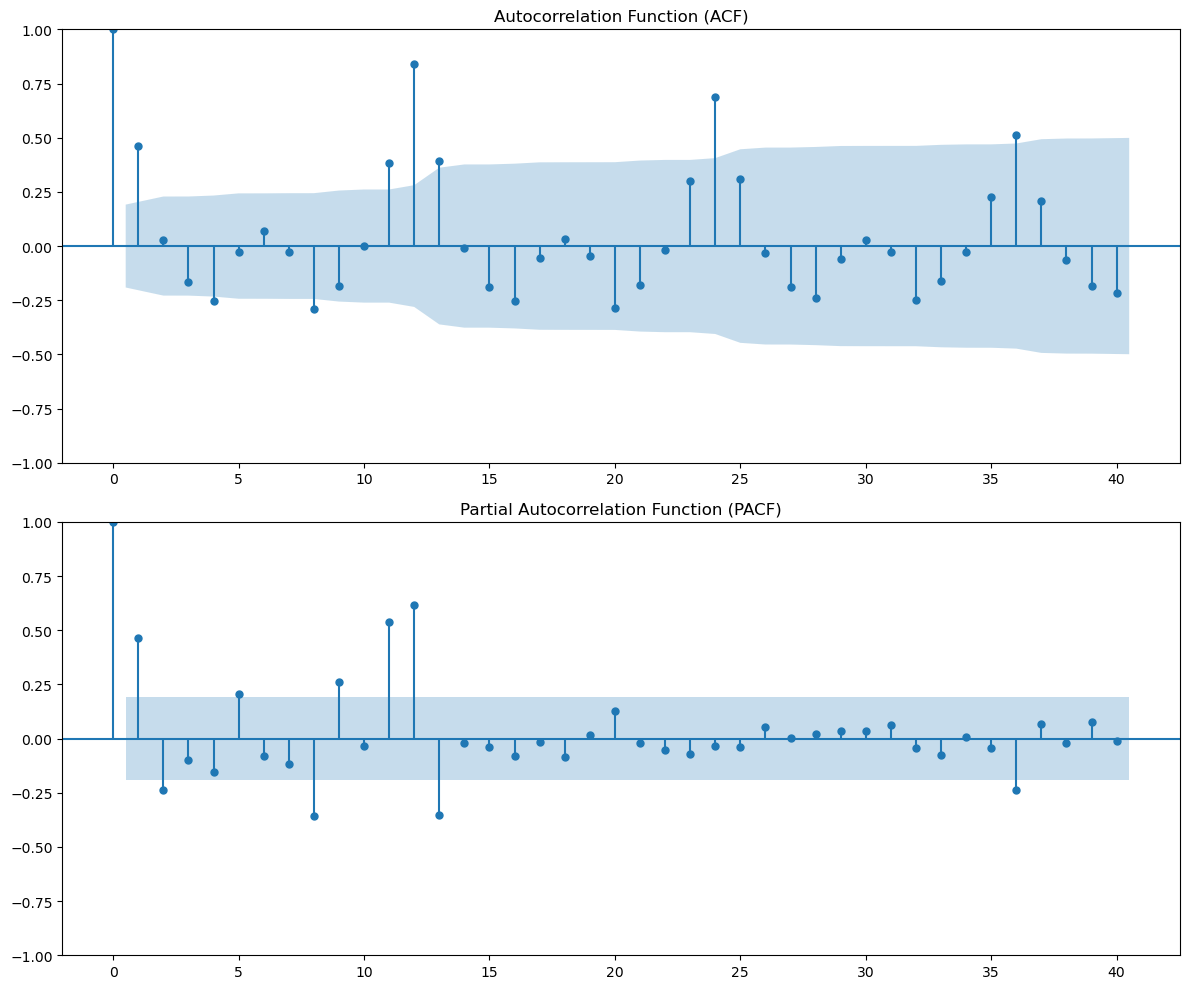

In [6]:
# ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(df['Sales'], ax=axes[0], lags=40)
axes[0].set_title("Autocorrelation Function (ACF)")
plot_pacf(df['Sales'], ax=axes[1], lags=40, method='ywm')
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()